In [2]:
# %%writefile 

import sys
import os 
module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path)


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tools.Sample_Tools as smpl

from base.JuUnits import excute_for_multidates


# %load_ext autoreload
# %autoreload 2
# %aimport Analysis_Funs,Ind_Model_Base

In [113]:
from tools.Cacher import (CACHE_TYPE, save_cache,load_cache_adv,load_cache)

# tail = False
# if tail:
#     df_all = load_cache('all_tail_qfq',cache_type=CACHE_TYPE.STOCK).sort_index()
# else:
#     df_all = load_cache('all_train_qfq',cache_type=CACHE_TYPE.STOCK).sort_index()
# smpl.optimize_data_type(df_all)

# df_treated = pretreate_data(df_all)

year = '2020'
data_ = df_all.loc[year+'-01-03':year+'-12-28']

codes = data_.index.get_level_values(1).unique()
dates = data_.index.get_level_values(0).unique()
data_replenish = load_cache_adv('all_train_qfq',
                                dates.min().strftime('%Y-%m-%d'),
                                dates.max().strftime('%Y-%m-%d'),
                                cache_type=CACHE_TYPE.STOCK).sort_index()

ret = smpl.get_forward_return(data_replenish,'close')
ret.name = 'ret_forward'
ret[np.abs(ret)>0.15]=np.nan

In [165]:


# turnover = data_['volume'] / (data_['lshares'] *100) # 手/万股

# # # 换手率稳定性=𝑠𝑡𝑑(最近一段时间日度换手率序列) #不太行
# turn_std_1m = excute_for_multidates(turnover, lambda x:x.rolling(22).std(), level=1)
# turn_std_3m = excute_for_multidates(turnover, lambda x:x.rolling(66).std(), level=1)

# # 换手率变异系数=𝑠𝑡𝑑(最近一段时间日度换手率序列)/𝑚𝑒𝑎𝑛(最近一段时间日度换手率序列)
# turn_mean_1m = excute_for_multidates(turnover, lambda x:x.rolling(22).mean(), level=1)
# turn_mean_3m = excute_for_multidates(turnover, lambda x:x.rolling(66).mean(), level=1)
# turn_cv_1m = turn_std_1m/turn_mean_1m # 好
# turn_cv_3m = turn_std_3m/turn_mean_3m 

# # 异常换手率=(𝑚𝑒𝑎𝑛(短期日度换手率)−𝑚𝑒𝑎𝑛(长期日度换手率)) /𝑠𝑡𝑑(长期日度换手率) #不太行
# turn_ext = (turn_std_1m - turn_std_3m)/turn_std_3m

# # 非流动性=𝑚𝑒𝑎𝑛(日绝对收益率/日成交额) # 好 #不要平均，平均后不管是信号还是收益还是ic，都显著下降，
# cur_ret_abs = smpl.get_current_return(data_replenish,'close').abs()
# amihud = cur_ret_abs / data_replenish['amount']

# # 非流动性_改进=𝑚𝑒𝑎𝑛(最近一段时间日绝对收益率序列)/𝑚𝑒𝑎𝑛(最近一段时间日成交额序列) # 好
# amihud_adv_5 = excute_for_multidates(cur_ret_abs, lambda x:x.rolling(5).mean(), level=1) / excute_for_multidates(data_replenish['amount'], lambda x:x.rolling(5).mean(), level=1) 

# # 负收益非流动性=𝑚𝑒𝑎𝑛(最近一段时间日绝对收益率序列_收益为负)/𝑚𝑒𝑎𝑛(最近一段时间日成交额序列_收益为负) # 一般，凹型，窗口越大信号越明显，但是总收益再下降。
# negative_ret = smpl.get_current_return(data_replenish,'close')
# negative_ret[negative_ret>0]=0
# negative_ret = negative_ret.abs()
# amihud_negative_22 = excute_for_multidates(negative_ret, lambda x:x.rolling(22).mean(), level=1) / excute_for_multidates(data_replenish['amount']*np.sign(negative_ret), lambda x:x.rolling(22).mean(), level=1) 


# # 非流动性变异系数 = (𝑠𝑡𝑑(绝对收益率序列)/𝑚𝑒𝑎𝑛(绝对收益率序列)) / (𝑠𝑡𝑑(成交额序列)/𝑚𝑒𝑎𝑛(成交额序列)) # 一般，信号不是非常显著，ic还行，高低差异大，中间没啥差异且跟第一差别不算大。
# numerator = excute_for_multidates(cur_ret_abs, lambda x:x.rolling(5).std(), level=1) / excute_for_multidates(cur_ret_abs, lambda x:x.rolling(5).𝑚𝑒𝑎𝑛(), level=1)
# denominator = excute_for_multidates(data_replenish['amount'], lambda x:x.rolling(5).std(), level=1) / excute_for_multidates(data_replenish['amount'], lambda x:x.rolling(5).𝑚𝑒𝑎𝑛(), level=1)
# amihud_cv_5 = numerator / denominator





date        code  
2020-01-03  000001             NaN
            000002             NaN
            000006             NaN
            000007             NaN
            000008             NaN
                          ...     
2020-12-28  605376    4.423023e-11
            605377             NaN
            605388    2.043310e-10
            605399    5.553669e-10
            605500             NaN
Length: 670825, dtype: float64

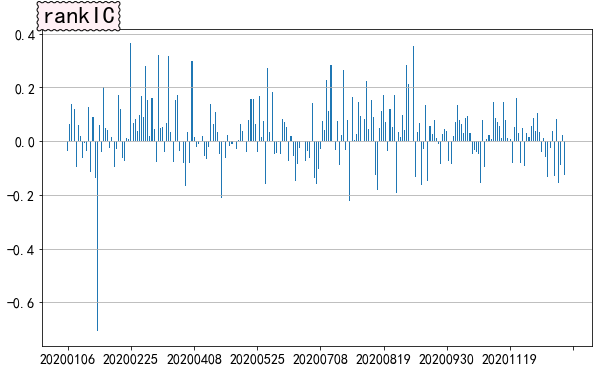

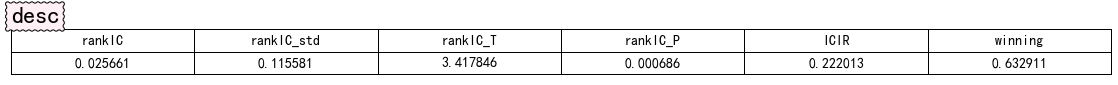

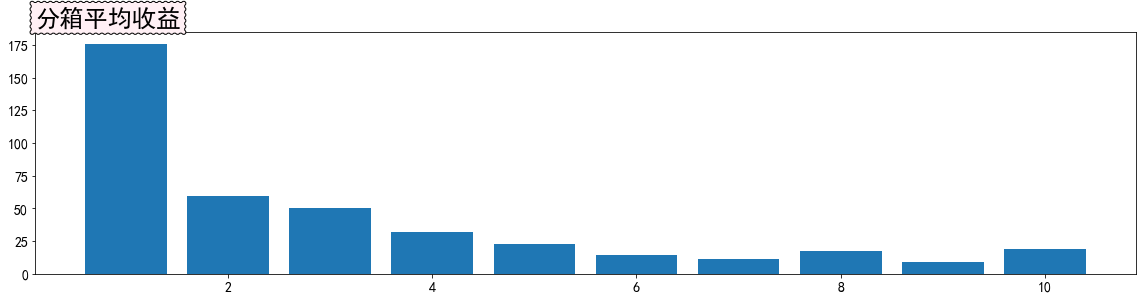

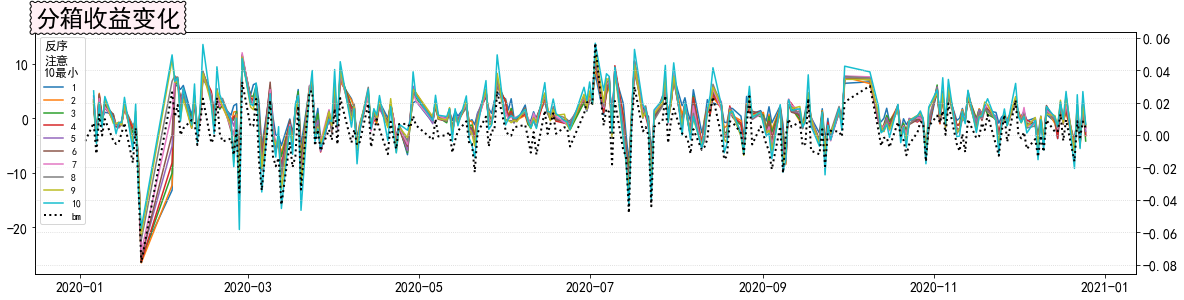

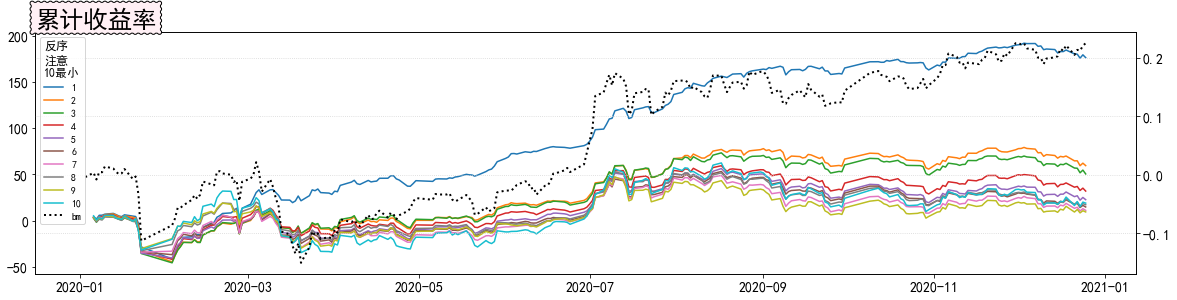

Wall time: 18.7 s


In [128]:
%%time
from tools.Test_Tools_Simple import FactorTest

# %load_ext autoreload
# %autoreload 1
# %aimport tools.Test_Tools_Simple

fa = pd.DataFrame(amihud).dropna()
fa.columns=['xxx']
test = FactorTest(start=dates.min().strftime('%Y-%m-%d'),end=dates.max().strftime('%Y-%m-%d'),target_field='xxx',blenchmark_name='沪深300', freq="d")
test.process_ind_simple(fa,ret,need_descript=True)
test.plot()


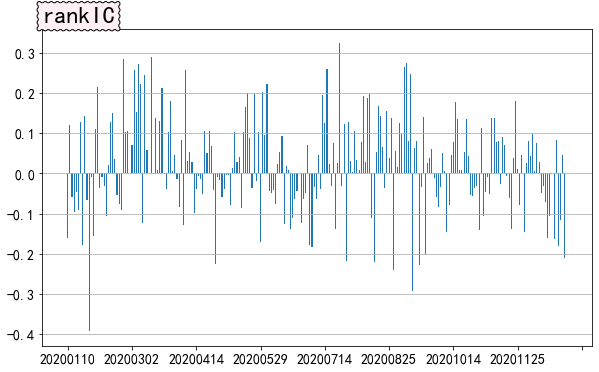

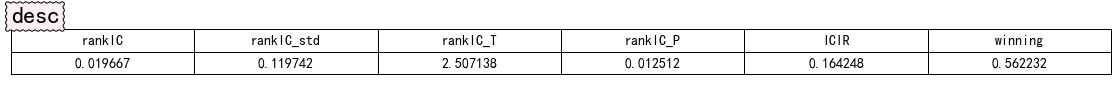

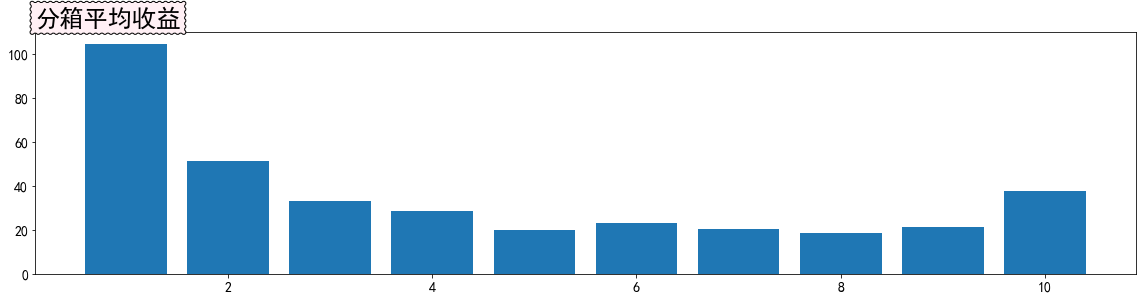

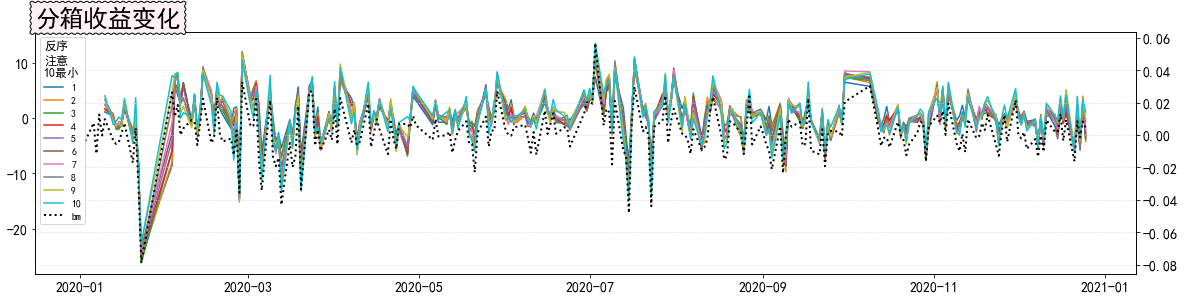

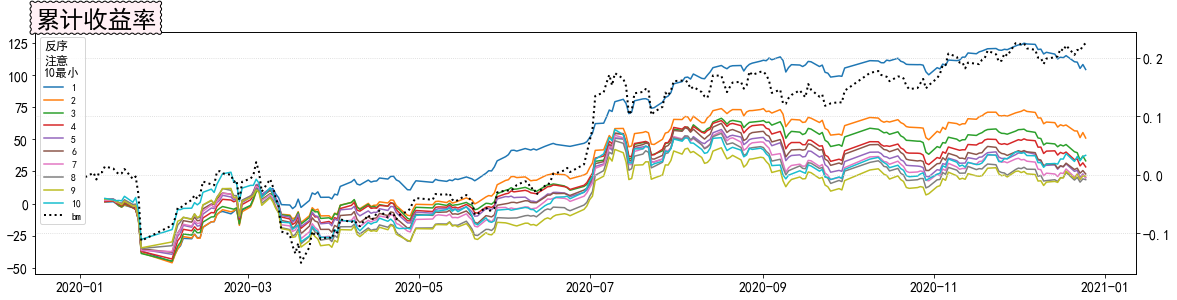

In [143]:
fa = pd.DataFrame(amihud_adv_5).dropna()
fa.columns=['xxx']
test = FactorTest(start=dates.min().strftime('%Y-%m-%d'),end=dates.max().strftime('%Y-%m-%d'),target_field='xxx',blenchmark_name='沪深300', freq="d")
test.process_ind_simple(fa,ret,need_descript=True)
test.plot()

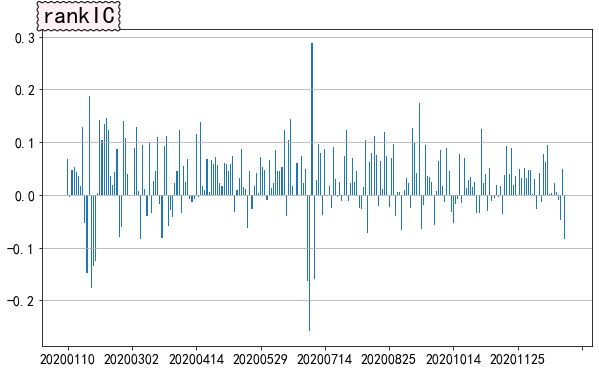

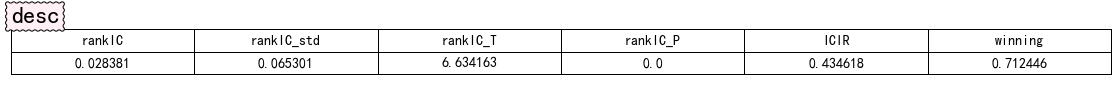

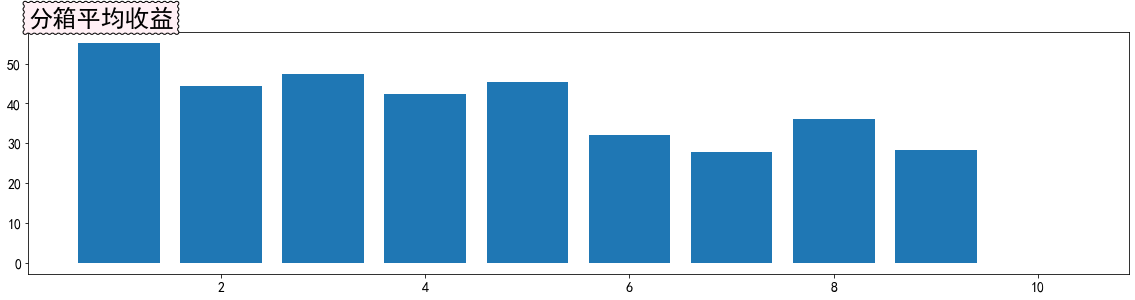

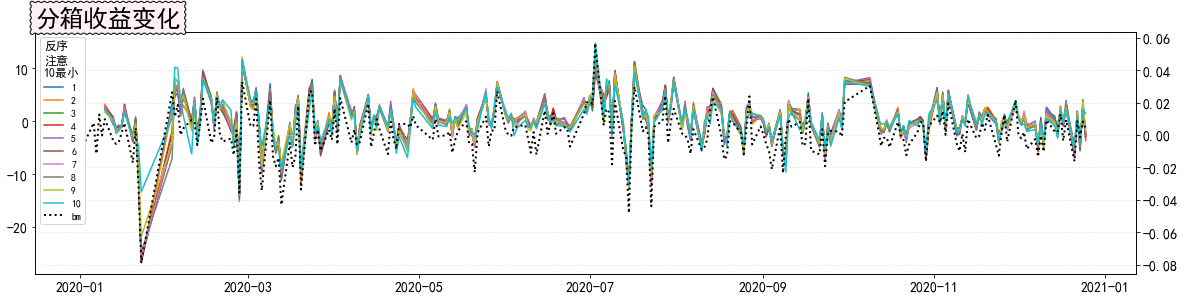

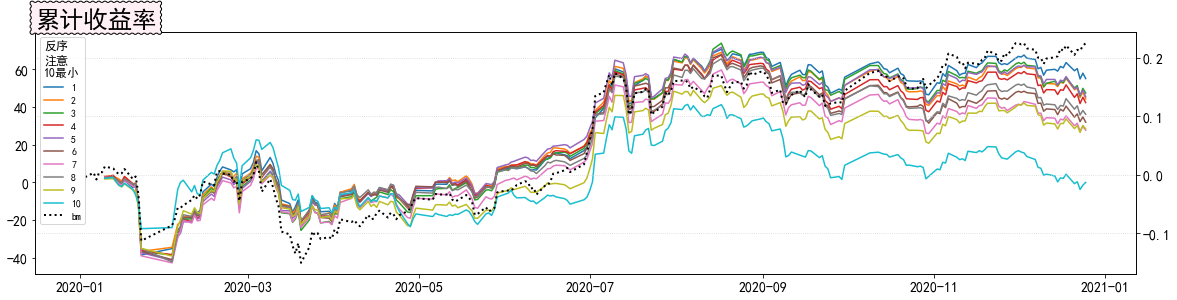

In [162]:
fa = pd.DataFrame(amihud_cv_5).dropna()
fa.columns=['xxx']
test = FactorTest(start=dates.min().strftime('%Y-%m-%d'),end=dates.max().strftime('%Y-%m-%d'),target_field='xxx',blenchmark_name='沪深300', freq="d")
test.process_ind_simple(fa,ret,need_descript=True)
test.plot()


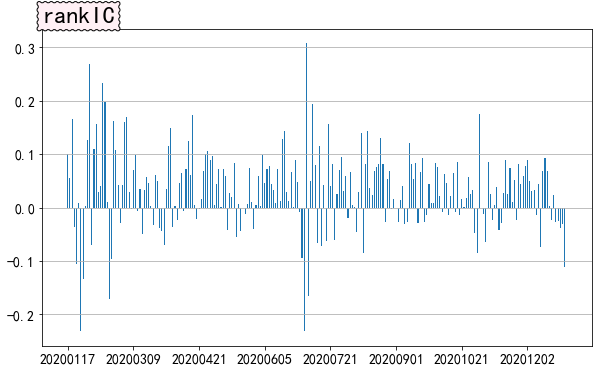

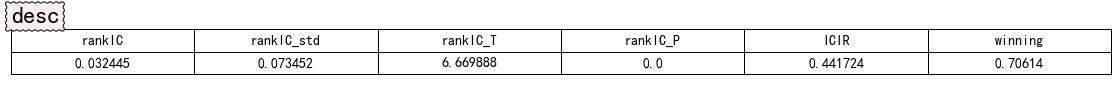

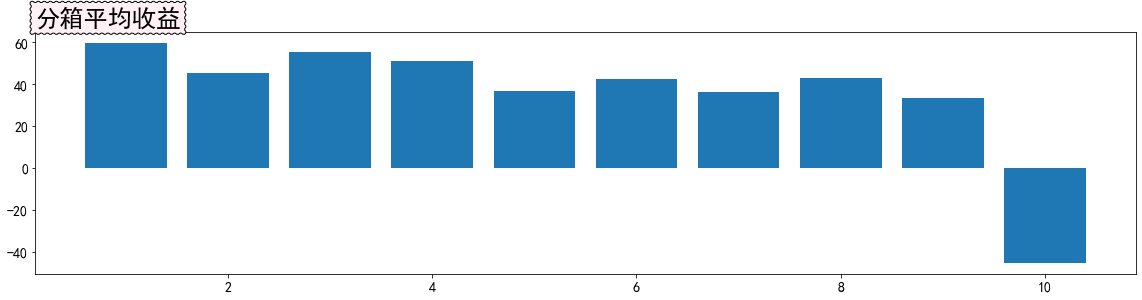

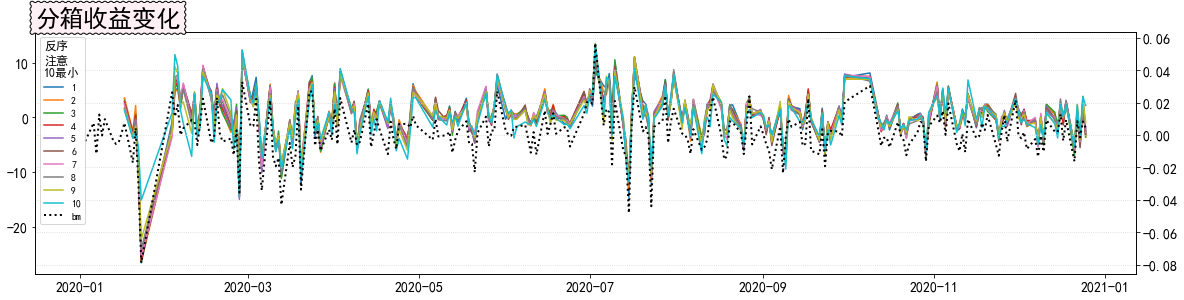

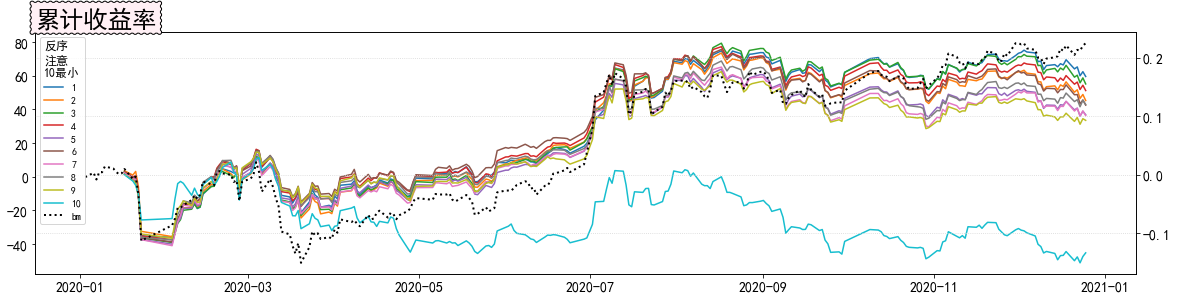

In [164]:
fa = pd.DataFrame(amihud_cv_10).dropna()
fa.columns=['xxx']
test = FactorTest(start=dates.min().strftime('%Y-%m-%d'),end=dates.max().strftime('%Y-%m-%d'),target_field='xxx',blenchmark_name='沪深300', freq="d")
test.process_ind_simple(fa,ret,need_descript=True)
test.plot()
